In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.interpolate import interp2d, RectBivariateSpline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# file = sio.loadmat('velocity_results/snap500.mat')
file = sio.loadmat('Re250_force1_k4/snap4999.mat')
U1, U2, DU1Dt, DU2Dt = file['U1'], file['U2'], file['DU1Dt'], file['DU2Dt']
print(U1[0])

[[0.33407702 0.28031167 0.21130809 ... 0.41661057 0.40364576 0.37613997]
 [0.25944841 0.18913772 0.11715258 ... 0.3894704  0.35086605 0.31355118]
 [0.1902847  0.10877156 0.02517821 ... 0.36994233 0.30391538 0.25147774]
 ...
 [0.58691671 0.54323704 0.47803482 ... 0.56549657 0.5844833  0.59700581]
 [0.49342528 0.45519194 0.38179849 ... 0.50157262 0.50754871 0.50391273]
 [0.40956932 0.37087914 0.29950225 ... 0.4535187  0.45085165 0.43244166]]


In [3]:
max_steps = U1.shape[0]
dt = 2e-3
print(max_steps)

4999


In [4]:
def complete_periodic_field(z0):
    z = np.zeros((z0.shape[0]+1, z0.shape[0]+1))
    z[:-1, :-1] = z0
    z[-1] = z[0]
    z[:, -1] = z[:, 0]
    return z

In [5]:
x1d = np.linspace(0, 2*np.pi, 129)
x, y = np.meshgrid(x1d, x1d)
z = complete_periodic_field(U1[0])
print(z)

f_ux, f_uy = [], []
f_duxdt, f_duydt = [], []
t = []

for i in np.arange(max_steps):
    
    f_ux.append(RectBivariateSpline(x1d, x1d, complete_periodic_field(U1[i].T)))
    f_uy.append(RectBivariateSpline(x1d, x1d, complete_periodic_field(U2[i].T)))
    f_duxdt.append(RectBivariateSpline(x1d, x1d, complete_periodic_field(DU1Dt[i].T)))
    f_duydt.append(RectBivariateSpline(x1d, x1d, complete_periodic_field(DU2Dt[i].T)))
    t.append(i*dt)

print(len(f_ux))

[[0.33407702 0.28031167 0.21130809 ... 0.40364576 0.37613997 0.33407702]
 [0.25944841 0.18913772 0.11715258 ... 0.35086605 0.31355118 0.25944841]
 [0.1902847  0.10877156 0.02517821 ... 0.30391538 0.25147774 0.1902847 ]
 ...
 [0.49342528 0.45519194 0.38179849 ... 0.50754871 0.50391273 0.49342528]
 [0.40956932 0.37087914 0.29950225 ... 0.45085165 0.43244166 0.40956932]
 [0.33407702 0.28031167 0.21130809 ... 0.40364576 0.37613997 0.33407702]]
4999


In [6]:
np.savez('interp4999.npz',f_ux=f_ux, f_uy=f_uy, f_duxdt=f_duxdt, f_duydt=f_duydt, f_t=t)

Validations

In [7]:
f = RectBivariateSpline(x1d, x1d, complete_periodic_field(U1[0].T))
z2 = f.ev(x, y)
print(z2)
print(f.ev(.0, .04))

[[0.33407702 0.28031167 0.21130809 ... 0.40364576 0.37613997 0.33407702]
 [0.25944841 0.18913772 0.11715258 ... 0.35086605 0.31355118 0.25944841]
 [0.1902847  0.10877156 0.02517821 ... 0.30391538 0.25147774 0.1902847 ]
 ...
 [0.49342528 0.45519194 0.38179849 ... 0.50754871 0.50391273 0.49342528]
 [0.40956932 0.37087914 0.29950225 ... 0.45085165 0.43244166 0.40956932]
 [0.33407702 0.28031167 0.21130809 ... 0.40364576 0.37613997 0.33407702]]
0.2725289381994035


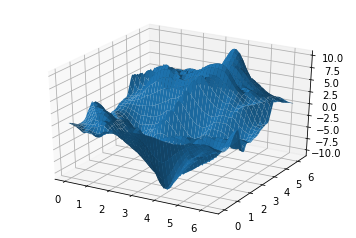

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()

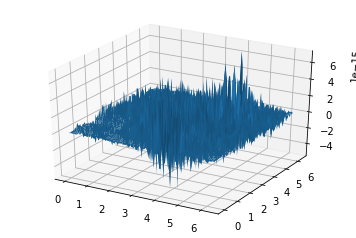

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z-z2)
plt.show()